## Problema 1

Diseña un robot que se mueve en 1D con aceleración constante

Ejecución de ejemplo:

    %run -i code/filter.py
    o = ConstantAccelerationRobot(accel=0.1, mnoise=3)
    o.move_n_time_steps(n=30)
    real, measured = o.pos_history, o.m_history
    plot_moves (real, measured)


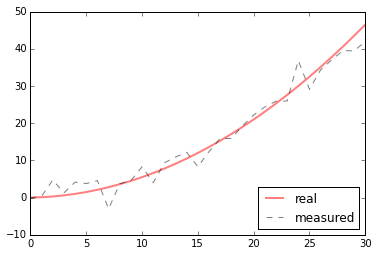

In [2]:
from IPython.display import Image
Image(filename='imgs/robot-accelerated.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class ConstantAccelerationRobot(object):
    
    def __init__ (self, init_pos=0., init_vel=0., accel=0., mnoise=0.1):
        self.pos   = init_pos
        self.vel   = init_vel
        self.accel = accel
        self.mnoise = mnoise
        self.pos_history = [self.pos]
        self.vel_history = [self.vel]
        self.m_history = [self.measure_position()]
        
    def measure_position(self):
        # --------------
        # TU CODIGO AQUI
        mi_medida = self.pos + np.random.normal(0, self.mnoise) if self.mnoise!=0 else self.pos
        return mi_medida
        # --------------
        
    def move(self):
        pass
        # --------------
        # TU CODIGO AQUI 
        #    ... actualiza las variables self.vel y self.pos
        #    ... anade la posicion y la medida tomada en las variables
        #        pos_history, vel_history y m_history
        # --------------
        self.vel+=0.1
        self.pos += self.vel        
        self.pos_history.append(self.pos)
        self.vel_history.append(self.vel)
        self.m_history.append(self.measure_position())
        

    def move_n_time_steps(self, n):
        for t in range(n):
            self.move()

Comprueba tu código

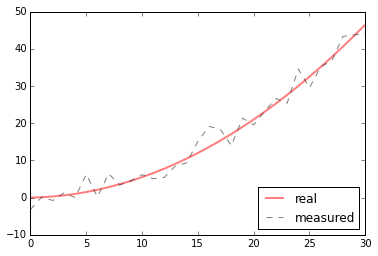

In [4]:
%run -i code/filter.py
o = ConstantAccelerationRobot(accel=0.1, mnoise=3)
o.move_n_time_steps(n=30)
real, measured = o.pos_history, o.m_history
plot_moves (real, measured)

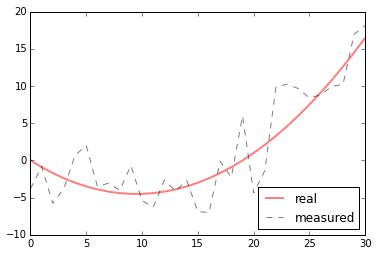

In [5]:
%run -i code/filter.py
o = ConstantAccelerationRobot(init_vel=-1, accel=0.1, mnoise=3)
o.move_n_time_steps(n=30)
real, measured = o.pos_history, o.m_history
plot_moves (real, measured)

## Problema 2

Observa el siguiente código en donde usamos un filtro de Kalman 2D (posición y velocidad) para estimar la posición de un robot con aceleración constante.

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


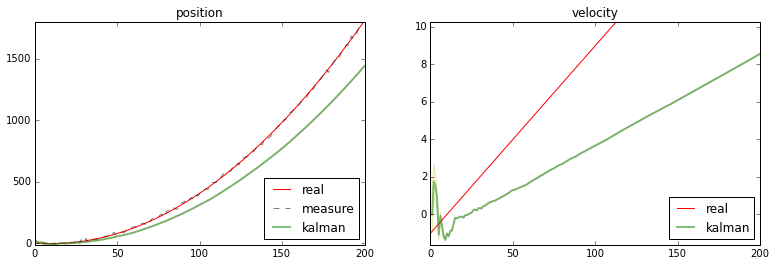

In [6]:
%run -i code/filter.py

def pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,
                                P,Q,R):

    init_x = [np.array([estimated_init_pos]), np.array([estimated_init_vel])]

    o = ConstantAccelerationRobot(init_pos=robot_pos, init_vel=robot_vel, accel=robot_accel, mnoise=R)
    o.move_n_time_steps(n=200)
    phist, mhist = o.pos_history, np.array(o.m_history)

    F = np.array([[1, 1], [0, 1]])  # state transition matrix
    H = np.array([[1, 0]])          # Measurement function

    k = KalmanFilter(dim_x=2, dim_z=1, P=P, R=R, Q=Q, F=F, H=H, init_x=init_x)
    xhist, Phist = k.filter_data(mhist)

    xhist = [[i[0][0], i[1][0]] for i in xhist]
    plot_kalman_position_velocity(phist, mhist, xhist, Phist, o.vel_history )

    
robot_pos, robot_vel, robot_accel      = 0., -1., 0.1
estimated_init_pos, estimated_init_vel = 0., 0.
P, R, Q                                = 1., 10., 0.

pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel, 
                            estimated_init_pos, estimated_init_vel,
                            P, Q, R)

La estimación de la posición diverge porque nuestro modelo físico es incorrecto ya que asume que no hay aceleración.

Diseña un filtro de Kalman de forma que:

- el estado esté compuesto por 3 variables (posición, velocidad y aceleración), de las cuales sólo podemos medir una
- la matriz $H$ haga corresponder nuestro estado de tres variables con la observación únicamente de la posición.
- la matriz $F$ represente el siguiente modelo:

$$ s^- = s + v + a $$
$$ v^- = v + a$$
$$ a^- = a $$

_En realidad, el modelo es $s^- = s + v\Delta t + a\Delta t^2$, pero lo simplificamos ya que asumimos que $\Delta t = 1$_

Respuesta esperada:

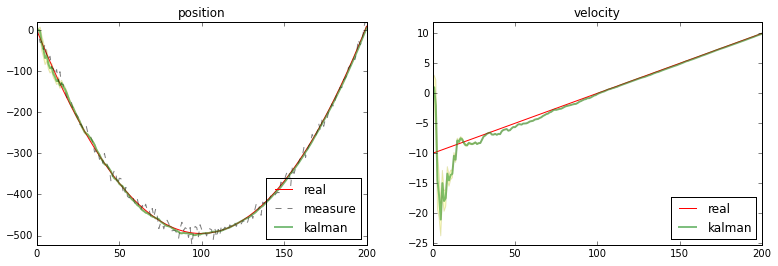

In [7]:
from IPython.display import Image
Image(filename='imgs/kalman-1.png')

In [8]:
%run -i code/filter.py


def pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R):
    
    # --- FIJATE COMO EL ESTADO AHORA TIENE TRES COMPONENTES ----
    init_x = [np.array([estimated_init_pos]), np.array([estimated_init_vel]), np.array([estimated_init_accel])]

    o = ConstantAccelerationRobot(init_pos=robot_pos, init_vel=robot_vel, accel=robot_accel, mnoise=R)
    o.move_n_time_steps(n=200)
    phist, mhist = o.pos_history, np.array(o.m_history)

    # -----------------
    # TU CODIGO AQUI
    F =  np.array([[1, 1, 1], [0, 1, 1],[0, 0, 1]])   # state transition matrix
    H =  np.array([[1, 0,0]])   # Measurement function
    # -----------------
     
    k = KalmanFilter(dim_x=3, dim_z=1, P=P, R=R, Q=Q, F=F, H=H, init_x=init_x)
    xhist, Phist = k.filter_data(mhist)

    xhist = [[i[0][0], i[1][0]] for i in xhist]
    plot_kalman_position_velocity(phist, mhist, xhist, Phist, o.vel_history )


/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


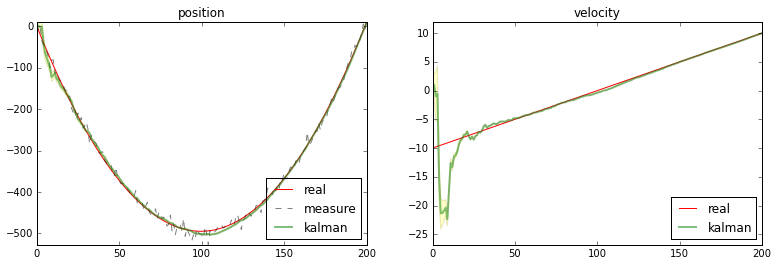

In [9]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 0.
P, R, Q                 = 1., 10., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R)

## Problema 3

Ejecuta el experimento anterior 4 veces con las siguientes variaciones:

- Con un gran error en la estimación inicial de la velocidad (init_vel=100)
- Con un gran error en la estimación inicial de la aceleración (init_accel=100)
- Con un gran ruido de medida ($R=100$)
- Con un gran ruido de medida ($R=100$) pero también con gran confianza en nuestras estimaciones iniciales ($P=0.001$)

Explica los resultados obtenidos

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


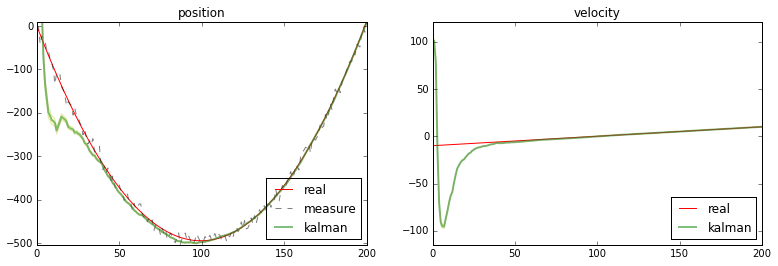

In [14]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 100., 1.
P, R, Q                 = 1., 10., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,P,Q,R)

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


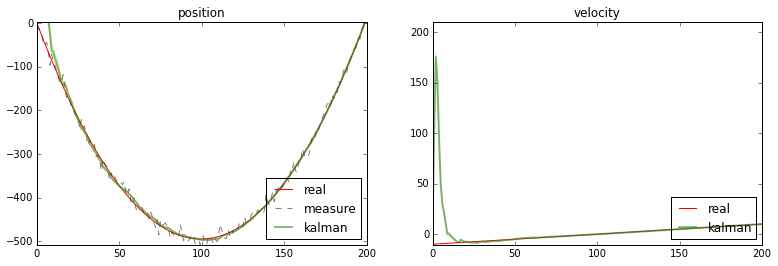

In [21]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 100.
P, R, Q                 = 1., 10., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,P,Q,R)

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


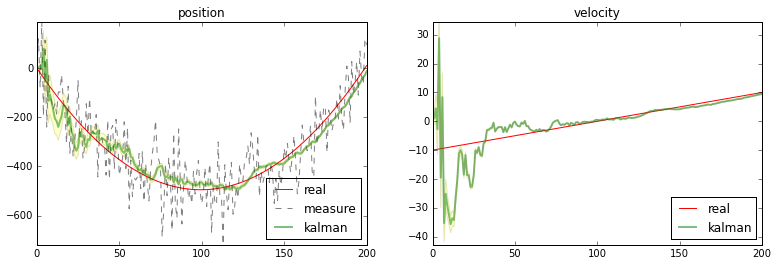

In [22]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 0.
P, R, Q                 = 1., 100., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R)

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


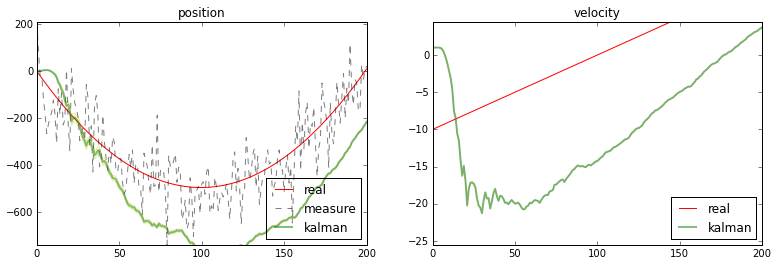

In [55]:
robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 0.
P, R, Q                 = .001, 100., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R)

## Problema 4 (EXTRA)

realiza el mismo experimento que en el Problema 2, pero ahora perdemos la señal entre los instantes de tiempo 70 y 130, y asumimos que la medida entre esos instantes de tiempo es constante e igual a la última medida vista en $t=70$.

Resultado esperado:

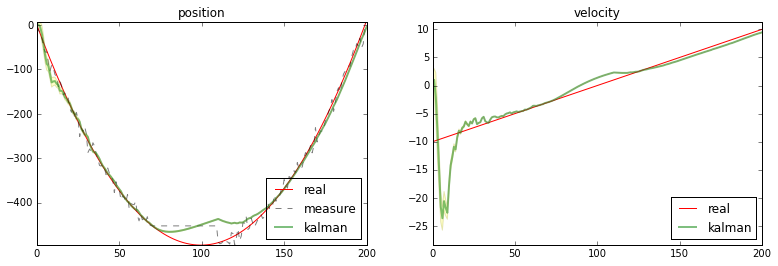

In [17]:
from IPython.display import Image
Image(filename='imgs/kalman-2.png')

/opt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


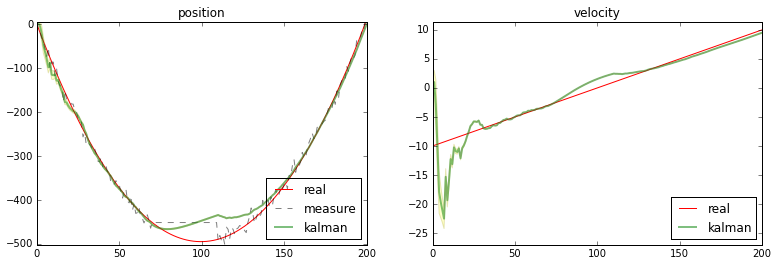

In [16]:
%run -i code/filter.py


def pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R):
    
    init_x = [np.array([estimated_init_pos]), np.array([estimated_init_vel]), np.array([estimated_init_accel])]

    o = ConstantAccelerationRobot(init_pos=robot_pos, init_vel=robot_vel, accel=robot_accel, mnoise=R)
    o.move_n_time_steps(n=200)
    phist, mhist = o.pos_history, np.array(o.m_history)

    # -----------------
    # TU CODIGO AQUI
    # modifica la señal en mhist entre las posiciones 70 y 110      
    mhist[70:110] =o.pos_history[70]#ultima posicion  medida 
    

    # usa las mismas matrices del ejercicio anterior
    F = np.array([[1, 1,1], [0, 1,1],[0,0,1]])  # state transition matrix
    H = np.array([[1, 0,0]])# Measurement function
    # -----------------
     
    k = KalmanFilter(dim_x=3, dim_z=1, P=P, R=R, Q=Q, F=F, H=H, init_x=init_x)
    xhist, Phist = k.filter_data(mhist)

    xhist = [[i[0][0], i[1][0]] for i in xhist]
    plot_kalman_position_velocity(phist, mhist, xhist, Phist, o.vel_history )


robot_pos, robot_vel, robot_accel = 0., -10., 0.1
estimated_init_pos, estimated_init_vel, estimated_init_accel = 0., 1., 0.
P, R, Q                 = 1., 10., 0.
pos_vel_1D_tracking_example(robot_pos, robot_vel, robot_accel,
                                estimated_init_pos, estimated_init_vel,estimated_init_accel,
                                P,Q,R)